# Confidential
Not to be shared with anyone without permission from Hopstack Inc. 

## Rules:
1. We expect you to take no more than three days to finish this assignment.
2. We expect you to solve these questions in python, and you are free to use whichever tools you like. 
3. You should be able to justify the programming and design choices you make. 

## 1. Operations Research
An automobile tire company has the ability to produce both nylon and fiberglass tires. During the next three months they have agreed to deliver tires as follows:

|Date  | 	Nylon (No. of Tires) |	Fiberglass (No. of Tires) |
|June 30 |	4000 |	1000 |
|July 31 |	8000 |	5000 |
|August 31 |	3000 |	5000 |


The company has two presses, a wheeling machine and a regal machine, and appropriate moulds that can be used to produce these tires, with the following production hours available in the upcoming months

|Month |	Wheeling Machine (Hours) |	Regal Machine (Hours) |
| --- | --- | --- |
|June |	700 |	1500 |
|July |	300 |	400 |
|August |	1000 |	300 |

The production rates (hours per tire) for each machine and tire combination are as follows:

|  	|Wheeling Machine (Hours/tire)	| Regal Machine (Hours/tire) |
| --- | --- | --- |
|Nylon |	0.15 |	0.16 |
|Fiberglass |	0.12 |	0.14 |

The variable costs of producing tires are USD 5.00 per operating hour, regardless of which machine is being used or which tire is being produced. There is also an inventory-carrying charge of USD 0.10 per tire per month. How should the production be scheduled in order to meet the delivery requirements at minimum costs? This problem constitutes 16 decision variables, 6 inequality and 6 equality linear constraints. 



In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
nProducts = 2
nMachines = 2
nMonths = 3
Demand = [[4000,1000],[8000,5000],[ 3000,5000]]
AvailMachineTime = [[700,1500],[300,400], [1000,300]]
ProdRate = [[0.15,0.16],[0.12,0.14]]
OperatingCost = 5
InventoryCost = 0.1

In [3]:
from pulp import *
from tabulate import tabulate

In [4]:
model = LpProblem("Cost Minimization Problem", LpMinimize)

In [5]:
# aij=Nylon i=month(1, 2, 3) j=machine type(1(Wheeling), 2 (Regal))
a11=LpVariable('a11', lowBound=0, cat='Integer')
a12=LpVariable('a12', lowBound=0, cat='Integer')
a21=LpVariable('a21', lowBound=0, cat='Integer')
a22=LpVariable('a22', lowBound=0, cat='Integer')
a31=LpVariable('a31', lowBound=0, cat='Integer')
a32=LpVariable('a32', lowBound=0, cat='Integer')

In [6]:
# bij=FiberGlass i=month(1, 2, 3) j=machine type(1(Wheeling), 2 (Regal))
b11=LpVariable('b11', lowBound=0, cat='Integer')
b12=LpVariable('b12', lowBound=0, cat='Integer')
b21=LpVariable('b21', lowBound=0, cat='Integer')
b22=LpVariable('b22', lowBound=0, cat='Integer')
b31=LpVariable('b31', lowBound=0, cat='Integer')
b32=LpVariable('b32', lowBound=0, cat='Integer')

In [7]:
# ikj=Inventory k=month(1, 2) j=material(1(Nylon), 2 (FiberGlass))
i11=LpVariable('i11', lowBound=0, cat='Integer')
i12=LpVariable('i12', lowBound=0, cat='Integer')
i21=LpVariable('i21', lowBound=0, cat='Integer')
i22=LpVariable('i22', lowBound=0, cat='Integer')

In [8]:
#Objective function
exp1 = LpAffineExpression(0.15*(a11+a21+a31)+0.12*(b11+b21+b31)+0.16*(a12+a22+a32)+0.14*(b12+b22+b32))
exp2 = LpAffineExpression(i11+i12+i21+i22)
model += 5*exp1 + 0.1*exp2

In [9]:
#Linear equalities
model += a11+a12-i11 ==4000
model += a21+a22+i11-i12 ==8000
model += b11+b12-i12 ==1000
model += i12+b21+b22-i22 ==5000
model += i21+a31+a32 ==3000
model += i22+b31+b32 ==5000

In [10]:
#Linear inequalities
model += 0.15*a11+0.12*b11<=700
model += 0.15*a21+0.12*b21<=300
model += 0.15*a31+0.12*b31<=1000
model += 0.16*a12+0.14*b12<=1500
model += 0.16*a22+0.14*b22<=400
model += 0.16*a32+0.14*b32<=300

In [11]:
model

Cost_Minimization_Problem:
MINIMIZE
0.75*a11 + 0.8*a12 + 0.75*a21 + 0.8*a22 + 0.75*a31 + 0.8*a32 + 0.6*b11 + 0.7000000000000001*b12 + 0.6*b21 + 0.7000000000000001*b22 + 0.6*b31 + 0.7000000000000001*b32 + 0.1*i11 + 0.1*i12 + 0.1*i21 + 0.1*i22 + 0.0
SUBJECT TO
_C1: a11 + a12 - i11 = 4000

_C2: a21 + a22 + i11 - i12 = 8000

_C3: b11 + b12 - i12 = 1000

_C4: b21 + b22 + i12 - i22 = 5000

_C5: a31 + a32 + i21 = 3000

_C6: b31 + b32 + i22 = 5000

_C7: 0.15 a11 + 0.12 b11 <= 700

_C8: 0.15 a21 + 0.12 b21 <= 300

_C9: 0.15 a31 + 0.12 b31 <= 1000

_C10: 0.16 a12 + 0.14 b12 <= 1500

_C11: 0.16 a22 + 0.14 b22 <= 400

_C12: 0.16 a32 + 0.14 b32 <= 300

VARIABLES
0 <= a11 Integer
0 <= a12 Integer
0 <= a21 Integer
0 <= a22 Integer
0 <= a31 Integer
0 <= a32 Integer
0 <= b11 Integer
0 <= b12 Integer
0 <= b21 Integer
0 <= b22 Integer
0 <= b31 Integer
0 <= b32 Integer
0 <= i11 Integer
0 <= i12 Integer
0 <= i21 Integer
0 <= i22 Integer

In [12]:
model.solve()
LpStatus[model.status]

'Optimal'

In [13]:
print('Nylon Tyre Production for 3 months :'+'\n')
print(tabulate([[a11.varValue, a12.varValue], [a21.varValue, a22.varValue],[a31.varValue, a32.varValue]], 
               ["Wheeling", "Regal"], tablefmt="grid"))

Nylon Tyre Production for 3 months :

+------------+---------+
|   Wheeling |   Regal |
+============+=========+
|       3866 |    7822 |
+------------+---------+
|          0 |     312 |
+------------+---------+
|          0 |       0 |
+------------+---------+


In [14]:
print('FibreGlass Tyre Production for 3 months :'+'\n')
print(tabulate([[b11.varValue, b12.varValue], [b21.varValue, b22.varValue],[b31.varValue, b32.varValue]], 
               ["Wheeling", "Regal"], tablefmt="grid"))

FibreGlass Tyre Production for 3 months :

+------------+---------+
|   Wheeling |   Regal |
+============+=========+
|       1000 |       0 |
+------------+---------+
|       2500 |    2500 |
+------------+---------+
|       5000 |       0 |
+------------+---------+


## 2. Forecasting

The data in the ./data/ directory is from a meal delivery company which operates in multiple cities and delivers different types of meals. From various fulfillment centers across different cities they will dispatch their meal orders to their customers. It is your job to help our client to predict meal order demand for the upcoming weeks, such that our client can plan the stock of raw materials and staffing accordingly. Concretely we need you to predict meal-center combinations for the next 10 weeks (Weeks: 146-155).

We expect you to understand the underlying data (through descriptive analytics), develop a machine learning model to fulfill our clients request, and be able to justify and explain your design choices along the way.
s. 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
%matplotlib inline
color = sns.color_palette()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
%matplotlib inline
color = sns.color_palette()

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import xgboost as xgb
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [16]:
df, df1=pd.read_csv('fulfilment_center_info.csv'),pd.read_csv('meal_info.csv')

In [17]:
print(df.shape,df1.shape)

(77, 5) (51, 3)


In [18]:
df.head(),df1.head()

(   center_id  city_code  region_code center_type  op_area
 0         11        679           56      TYPE_A      3.7
 1         13        590           56      TYPE_B      6.7
 2        124        590           56      TYPE_C      4.0
 3         66        648           34      TYPE_A      4.1
 4         94        632           34      TYPE_C      3.6,
    meal_id   category cuisine
 0     1885  Beverages    Thai
 1     1993  Beverages    Thai
 2     2539  Beverages    Thai
 3     1248  Beverages  Indian
 4     2631  Beverages  Indian)

In [19]:
train, test = pd.read_csv('train.csv'),pd.read_csv('test.csv')

In [20]:
train.head(),test.head()

(        id  week  center_id  meal_id  checkout_price  base_price  \
 0  1379560     1         55     1885          136.83      152.29   
 1  1466964     1         55     1993          136.83      135.83   
 2  1346989     1         55     2539          134.86      135.86   
 3  1338232     1         55     2139          339.50      437.53   
 4  1448490     1         55     2631          243.50      242.50   
 
    emailer_for_promotion  homepage_featured  num_orders  
 0                      0                  0         177  
 1                      0                  0         270  
 2                      0                  0         189  
 3                      0                  0          54  
 4                      0                  0          40  ,
         id  week  center_id  meal_id  checkout_price  base_price  \
 0  1028232   146         55     1885          158.11      159.11   
 1  1127204   146         55     1993          160.11      159.11   
 2  1212707   146     

In [21]:
len(train['center_id'].unique()),len(train['meal_id'].unique())

(77, 51)

Since Center_id and meal_id provide additional information, I merged the dataframees to get complete information and increase the dimesionality of the problem. 

In [22]:
dfn=pd.merge(train,df,on='center_id', how='left').drop_duplicates().reset_index(drop=True)
dfn=pd.merge(dfn,df1,on='meal_id', how='left').drop_duplicates().reset_index(drop=True)
dfn

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [23]:
dft=pd.merge(test,df,on='center_id', how='left').drop_duplicates().reset_index(drop=True)
dft=pd.merge(dft,df1,on='meal_id', how='left').drop_duplicates().reset_index(drop=True)
dft

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32569,1039516,155,61,2304,483.09,483.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32570,1158107,155,61,2664,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian
32571,1444235,155,61,2569,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian


In [24]:
dfn.index=dfn["id"]
dft.index=dft["id"]
dfn=dfn.drop(["id"],axis=1)
dft=dft.drop(["id"],axis=1)
end = dfn['num_orders']
dfn.drop(labels=['num_orders'], axis=1, inplace = True)
dfn.insert(13, 'num_orders', end)
dfn

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,num_orders
id,,,,,,,,,,,,,,
1379560,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0,Beverages,Thai,177
1466964,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0,Beverages,Thai,270
1346989,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0,Beverages,Thai,189
1338232,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0,Beverages,Indian,54
1448490,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0,Beverages,Indian,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271326,145,61,1543,484.09,484.09,0,0,473,77,TYPE_A,4.5,Desert,Indian,68
1062036,145,61,2304,482.09,482.09,0,0,473,77,TYPE_A,4.5,Desert,Indian,42
1110849,145,61,2664,237.68,321.07,0,0,473,77,TYPE_A,4.5,Salad,Italian,501


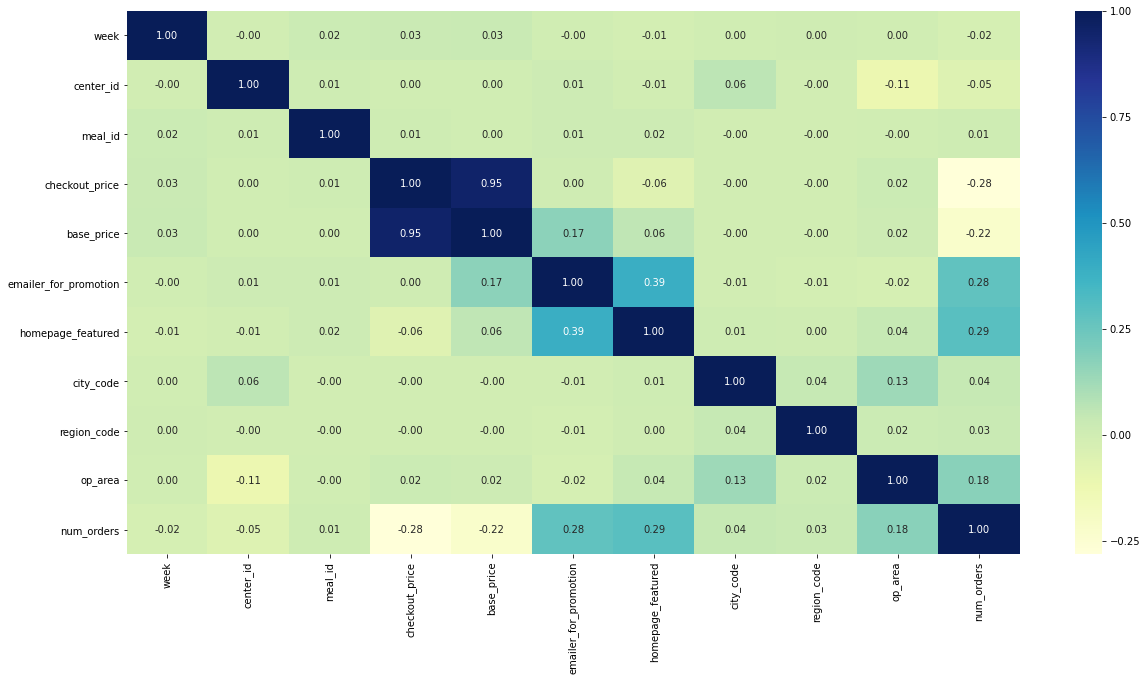

In [25]:
# Plotting the linear correlation between different numerical features
plt.figure(figsize=(20,10))
corr = dfn.corr()
sns.heatmap(corr,cmap="YlGnBu",annot=True, fmt='.2f');

Check_out price and base_price have the highest number of negative correlation with emailer_for_promotion and homepage_featured have highest positive correlation with num_orders.

In [26]:
train = dfn

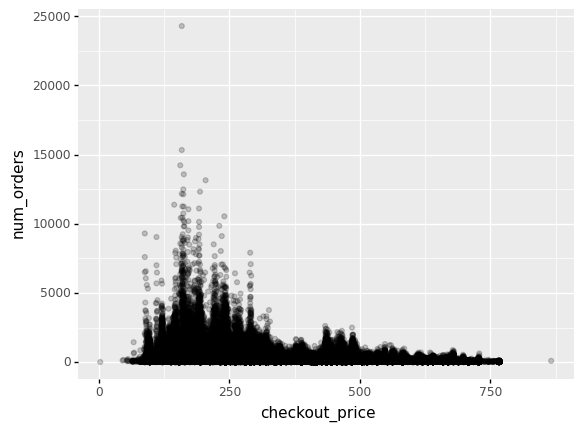

In [27]:
g=(p9.ggplot(data=train,
           mapping=p9.aes(x='checkout_price', y='num_orders'))
+ p9.geom_jitter(alpha=0.2)
+ p9.scales.scale_color_cmap(name='viridis'))
fig=g.draw()
fig.show()

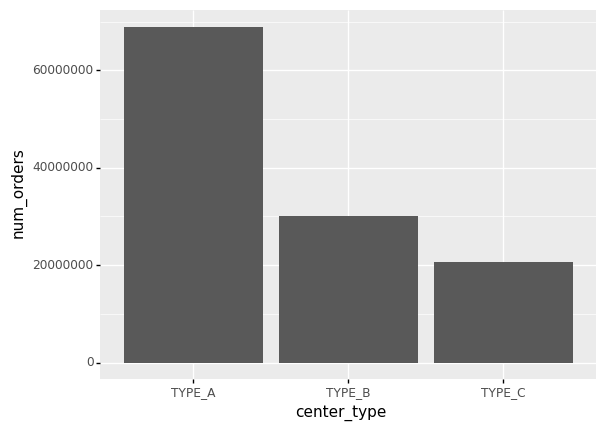

In [28]:
g=(p9.ggplot(data=train,
           mapping=p9.aes(x='center_type', y='num_orders'))
+ p9.geom_bar(stat='identity'))
fig=g.draw()
fig.show()

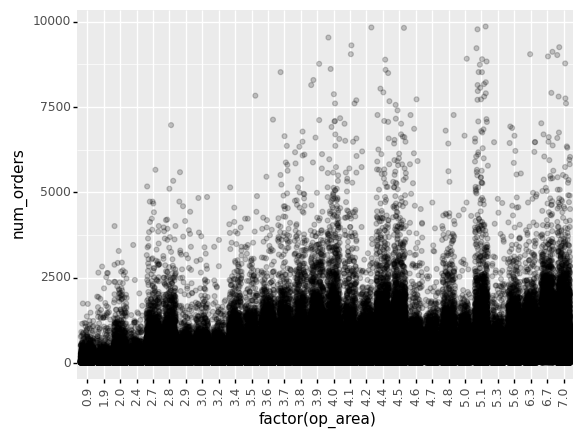

In [29]:
# Plot Number of Orders by Operating Area of the Center
g=(p9.ggplot(data=train[train['num_orders'] < 10000],
           mapping=p9.aes(x='factor(op_area)', y='num_orders'))
+ p9.geom_jitter(alpha=0.2)
+ p9.theme(axis_text_x=p9.element_text(angle=90)))
fig=g.draw()
fig.show()

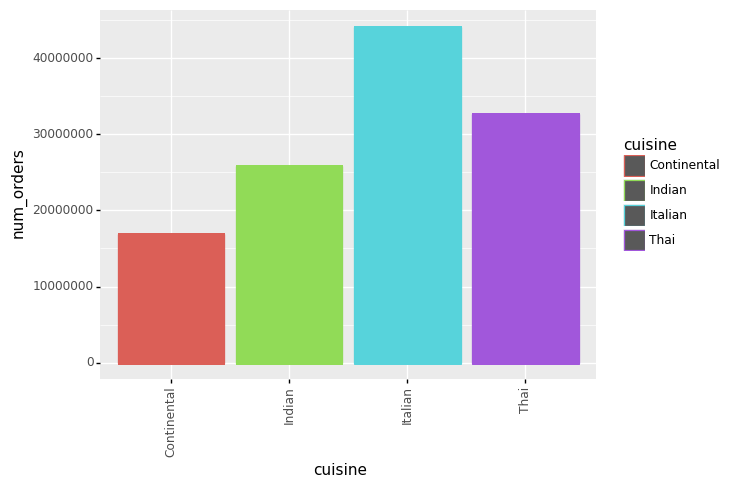

In [30]:

# Plot Number of Orders By Cuisine
g=(p9.ggplot(data=train,
           mapping=p9.aes(x='cuisine', y='num_orders', color='cuisine'))
+ p9.geom_bar(stat='identity')
+ p9.theme(axis_text_x=p9.element_text(angle=90)));

fig=g.draw()
fig.show()

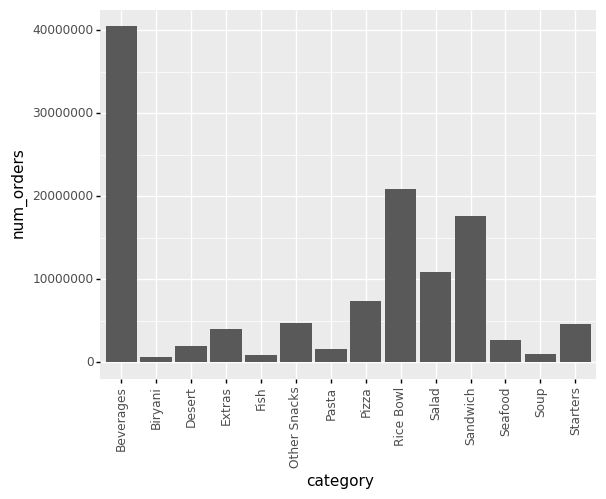

In [32]:
 

# Plot Number of Orders By Category
g=(p9.ggplot(data=train,
           mapping=p9.aes(x='category', y='num_orders'))
+ p9.geom_bar(stat='identity')
+ p9.theme(axis_text_x=p9.element_text(angle=90)));

fig=g.draw()
fig.show()

In [33]:
lb = LabelEncoder()
dfn['week'] = lb.fit_transform(dfn['week'])
dfn['city_code'] = lb.fit_transform(dfn['city_code'])
dfn['region_code'] = lb.fit_transform(dfn['region_code'])
dfn['op_area'] = lb.fit_transform(dfn['op_area'])
dfn['category'] = lb.fit_transform(dfn['category'])
dfn['cuisine'] = lb.fit_transform(dfn['cuisine'])
dfn['center_type'] = lb.fit_transform(dfn['center_type'])

In [34]:
#center_id and meal_id are dropped as they have no effect on outcome 
dfn = dfn.drop(columns = ['center_id', 'meal_id'], axis=1)
dfn

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,num_orders
id,,,,,,,,,,,,
1379560,0,136.83,152.29,0,0,30,3,2,2,0,3,177
1466964,0,136.83,135.83,0,0,30,3,2,2,0,3,270
1346989,0,134.86,135.86,0,0,30,3,2,2,0,3,189
1338232,0,339.50,437.53,0,0,30,3,2,2,0,1,54
1448490,0,243.50,242.50,0,0,30,3,2,2,0,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...
1271326,144,484.09,484.09,0,0,2,5,0,19,2,1,68
1062036,144,482.09,482.09,0,0,2,5,0,19,2,1,42
1110849,144,237.68,321.07,0,0,2,5,0,19,9,2,501


In [35]:
dv="num_orders"
dep=dfn[dv].values
iv=dfn.columns.tolist()
iv.remove(dv)
idep=dfn[iv].values
x_train, x_test, y_train, y_test = train_test_split(idep,dep, test_size=0.35, random_state=0)

In [36]:
np.shape(x_train)

(296756, 11)

In [37]:
dft = dft.drop(columns = ['center_id', 'meal_id'], axis=1)
dft 

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
id,,,,,,,,,,,
1028232,146,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1127204,146,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1212707,146,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1082698,146,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
1400926,146,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...
1250239,155,482.09,484.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
1039516,155,483.09,483.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
1158107,155,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian


This is a time series problem which can be solve using regression.
Random Forest Regressor is used as the learning model and Root of Mean Squared Logarithmic Error is used for evaluating.

In [38]:
pipe = make_pipeline(StandardScaler(),RandomForestRegressor())
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print(pipe.score(x_test, y_test))
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

0.786946331439154
RMSLE: 56.6147479243188


In [39]:
for keys in pipe.get_params().items():
    print(keys[0],": ",keys[1])

memory :  None
steps :  [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False))]
verbose :  False
standardscaler :  StandardScaler(copy=True, with_mean=True, with_std=True)
randomforestregressor :  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                 

In [40]:
hp = {'randomforestregressor__max_features' : ['auto','log2'],
                  'randomforestregressor__max_depth' : [None]}

search = GridSearchCV(pipe, hp, cv=2, verbose=1)

#Fit and tune model
search.fit(idep,dep)
print (search.best_params_)
print (search.refit)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.2s finished


{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'log2'}
True


In [41]:
#Encoding the testing set
dft['week'] = lb.fit_transform(dft['week'])
dfn['city_code'] = lb.fit_transform(dfn['city_code'])
dfn['region_code'] = lb.fit_transform(dfn['region_code'])
dft['op_area'] = lb.fit_transform(dft['op_area'])
dft['category'] = lb.fit_transform(dft['category'])
dft['cuisine'] = lb.fit_transform(dft['cuisine'])
dft['center_type'] = lb.fit_transform(dft['center_type'])

In [42]:
#prediction set
dft_pred = search.predict(dft)
dft_pred

array([233.875, 228.475, 248.575, ..., 264.8  , 264.8  , 290.8  ])

In [43]:
df = pd.DataFrame(dft_pred)
weeks = test['week']
df.insert(0, 'week', weeks)
df.columns = ['week', 'num_orders']
df

,week,num_orders
0,146,233.875
1,146,228.475
2,146,248.575
3,146,154.300
4,146,98.800
...,...,...
32568,155,29.800
32569,155,25.900
32570,155,264.800
32571,155,264.800


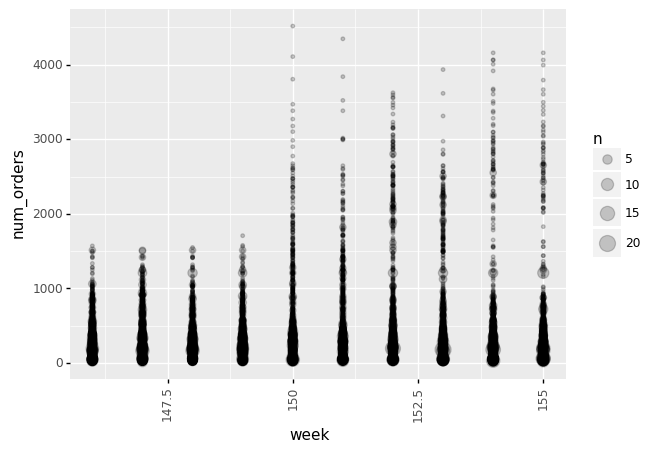

In [44]:
g=(p9.ggplot(data=df,
           mapping=p9.aes(x='week', y='num_orders'))
+ p9.geom_count(alpha=0.2)
+ p9.theme(axis_text_x=p9.element_text(angle=90)))
fig=g.draw()
fig.show()

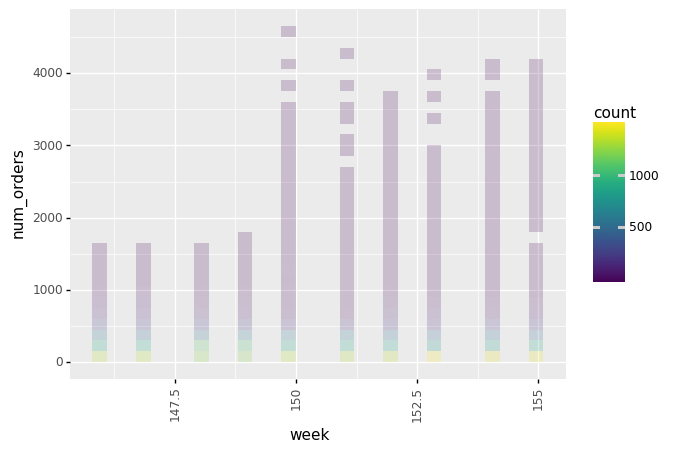

In [45]:
g=(p9.ggplot(data=df,
           mapping=p9.aes(x='week', y='num_orders'))
+ p9.geom_bin2d(alpha=0.2)
+ p9.theme(axis_text_x=p9.element_text(angle=90)))
fig=g.draw()
fig.show()

In [48]:
!jupyter nbconvert --to html Harshul_DS_Coding_Assignment.ipynb

[NbConvertApp] Converting notebook Harshul_DS_Coding_Assignment.ipynb to html
[NbConvertApp] Writing 868922 bytes to Harshul_DS_Coding_Assignment.html
